In [1]:
# Some python packages you may need in this project.
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import sympy as sym
sym.init_printing(use_unicode=True)
from sklearn import datasets
import pandas as pd

In [2]:
import os.path
from urllib.request import urlretrieve
if not os.path.isfile("answercheck.py"):
    urlretrieve('https://raw.githubusercontent.com/colbrydi/jupytercheck/master/answercheck.py', 'answercheck.py');

In [3]:
# Import for checking answers
from answercheck import checkanswer
# This turns off detailed warnings
checkanswer.detailedwarnings = False

---
<a name="pca_image_segmentation"></a>
# 1. Principal Component Analysis: color based image segmentation (40 pts)

Image segmentation is the process of separating the stuff you are interested in (foreground) with stuff you are not 
interested in (background).  Color is often used as an easy way to segment images.  Thresholds are selected for pixels in a range of color and defined as either foreground or background.

Faces come in a diverse range of colors making them difficult to segment using traditional **<font color="red">Red</font>**, **<font color="green">Green</font>** and **<font color="blue">Blue</font>** values.  

<img src="https://i.pinimg.com/236x/b6/dc/3f/b6dc3fb5f55696cb85bc1b849a24a36d--american-indians-children-books.jpg">

In this question we are going to use eigenvectors and Principal Component Analysis (PCA) to learn a new "skin tone colorspace" designed to make it much easier to segment faces (skin colors) from the background. 

To start we are going to download a bunch of color values from the following website.  

> https://archive.ics.uci.edu/ml/datasets/skin+segmentation#

The file we are interested in is linked below:

> https://archive.ics.uci.edu/ml/machine-learning-databases/00229/Skin_NonSkin.txt

The file contains thousands of colors selected from a diverse population of face images.  Note these colors are in the order BGR or **<font color="blue">Blue</font>**, **<font color="green">Green</font>** and **<font color="red">Red</font>**.  The file also contains hundreds of BGR colors selected from non-faces (these non-face colors are used in machine learning but are discarded for this homework). The fourth number in each row is a label where the number one (1) indicates the row is a skin color and two (2) indicates a non-skin color. 

The following cells downloads the file, removes all of the non-skin values, reorders the points to RGB and plots the skin points as a scatter plot in traditional **<font color="red">R</font>** **<font color="green">G</font>** **<font color="blue">B</font>** space. 


In [8]:
# Get the data file from the internet:
from urllib.request import urlopen, urlretrieve

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00229/Skin_NonSkin.txt'
file = "Skin_NonSkin.txt"

response = urlopen(url)
data = response.read()      # a `bytes` object
text = data.decode('utf-8') 
lines = text.split('\r\n')

data = []

# Read in file line by line
for line in lines:
    try:
        if line:
            data.append(list(map(int, line.split('\t'))))
    except:
        print('invalid line of data:',line)
response.close()

In [10]:
# Convert the file to a list of points
data = [points for points in data if points[-1] == 1]
# Extract the RGB components and store them in a separate list
rgb_data = [points[:-1] for points in data]

In [12]:
# Mask out only face values and keep just the RGBs
data = [points for points in data if points[-1] == 1]

In [14]:
# Change order to Red, Green, Blue
for points in rgb_data:
    points.reverse()

In [16]:
print(data[0])
rgb_data[0]

[74, 85, 123, 1]


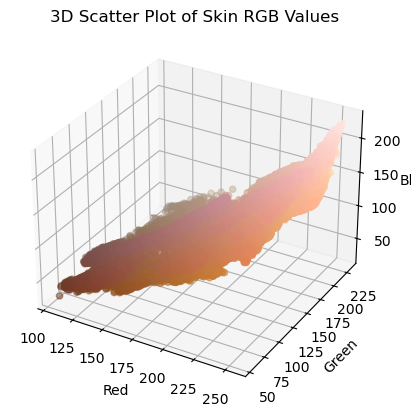

In [18]:
# Plot the points in 3D using their actual color values
# Plotting the points in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
rgb_data = np.array(rgb_data)

# Normalize the RGB values to [0, 1] for displaying colors
norm_rgb_data = rgb_data / 255.0

# Scatter plot
ax.scatter(rgb_data[:, 0], rgb_data[:, 1], rgb_data[:, 2], c=norm_rgb_data)

ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.set_title('3D Scatter Plot of Skin RGB Values')

plt.show()


#### <mark>&#9989; **<font color=red>Question 1.1</font>**: (6 points) </mark> 
* <mark>First, compute the average (mean) R, G and B values in the ```points``` plotted in the above figure. Store the these values in a vector named ```mn```. </mark>1
* <mark>Then, center the ```points``` around the origin by subtracting the mean values ```mn``` from each of the ```points``` and store the mean centered data in a new matrix called ```A```.</mark>    

In [20]:
#####Start your code here #####
# Convert the list of data points to a NumPy array if not already done
rgb_data = np.array(rgb_data)
# Compute the mean values for R, G, and B
mean_R = np.mean(rgb_data[:, 0])
mean_G = np.mean(rgb_data[:, 1])
mean_B = np.mean(rgb_data[:, 2])

# Store the mean values in a vector named mn
mn = np.array([mean_R, mean_G, mean_B])

# Center the points around the origin by subtracting the mean values
A = rgb_data - mn

# Print the mean values and the first few rows of the centered data matrix A for verification
print("Mean values (mn):", mn)
print("First few rows of the centered data matrix (A):")
print(A[:5])

#####End of your code here#####

Mean values (mn): [203.9919385  146.60111288 113.86987554]
First few rows of the centered data matrix (A):
[[-80.9919385  -61.60111288 -39.86987554]
 [-81.9919385  -62.60111288 -40.86987554]
 [-82.9919385  -63.60111288 -41.86987554]
 [-84.9919385  -65.60111288 -43.86987554]
 [-84.9919385  -65.60111288 -43.86987554]]


In [22]:
checkanswer.vector(mn,"1fa50978a380472875752d3d083afa41");

Testing Answer
Answer seems to be correct



In [24]:
checkanswer.matrix(A, "968ac30b396e941c60b6fcfeade0335c");

Testing Answer
Answer seems to be correct



Plot the centered points $A$ and make sure they are approximately centered around the origin.

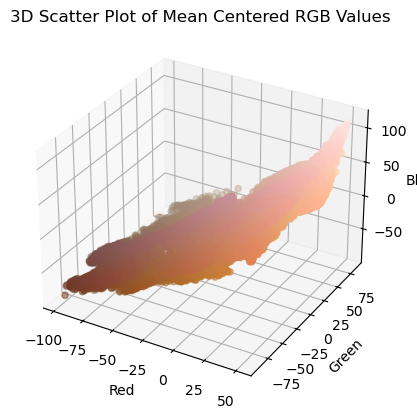

In [27]:
# Plot the points in 3D using their actual color values
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Normalize the RGB values to [0, 1] for displaying colors
norm_rgb_data = rgb_data / 255.0

# Scatter plot
ax.scatter(A[:, 0], A[:, 1], A[:, 2], c=norm_rgb_data)

ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.set_title('3D Scatter Plot of Mean Centered RGB Values')

plt.show()

<mark>&#9989; **<font color=red>Question 1.2</font>**: (10 points) </mark>
    
* <mark>Calculate the Gram matrix $C = A^T A$, store it in the variable $C$ and print its shape.</mark>

* <mark>Compute the eigenvalues ```vals``` and eigenvectors ```vecs``` of the Gram matrix $C$ and order the eigenvalues (and corresponding eigenvectors) in order of decreasing eigenvalues. </mark>

In [50]:
#####Start your code here #####
C = np.dot(A.T,A)
print(np.shape(C))
vals, vecs = np.linalg.eig(C)
# Order the eigenvalues (and correspondnig eigenvectors in order of decresing eigenvalues)
print(vals)
print(vecs)

#####End of your code here#####

(3, 3)
[2.10968950e+08 1.34010152e+07 1.29648732e+06]
[[-0.55967132 -0.66160005  0.49905249]
 [-0.55140969 -0.15224734 -0.82022442]
 [-0.61863993  0.73423847  0.2796042 ]]


In [52]:
checkanswer.matrix(C, "267893b255a1b2035403c91c74443a63");

Testing Answer
Answer seems to be correct



In [54]:
checkanswer.vector(vals, "b610cfc4a7d0a0d244b244af9f8607d9");

Testing Answer
Answer seems to be correct



In [56]:
checkanswer.matrix(vecs, "1ae3c284113d7aa8e560f8d829d35b0d");

Testing Answer
Answer seems to be correct



<mark>&#9989; **<font color=red>Question 1.3</font>**: (6 points) Verify if the $3 \times 3$ eigenvectors ```vecs``` is an orthogonal matrix. If not, orthonormalize ```vecs```. We will use ```vecs``` later as the color transformation matrix to transform points from RGB space into the new principal component's color space. </mark>

In [59]:
#####Start your code here #####
I = np.array([[1,0,0],[0,1,0],[0,0,1]])

#added rint because values were essentially zero, but python read as non-zero and caused the check to fail
vecs_chk = np.rint(np.dot(vecs.T,vecs))

print(vecs_chk == I)
print(vecs_chk)
print(I)

# if orthog_chk.all() == False:
#     print('not orthogonal')
#     #isolate individual vectors
#     v1 = vecs[:,0]
#     v2 = vecs[:,1]
#     v3 = vecs[:,2]
#     #calculate projections for v2 and v3
#     proj_21 = (np.dot(v2,v1)/np.dot(v1,v1))*v1
#     proj_31 = (np.dot(v3,v1)/np.dot(v1,v1))*v1
#     proj_32 = (np.dot(v3,v2)/np.dot(v2,v2))*v2
#     #use Gram-Schmidt to normalize
#     vecs_norm = [v1,v2-proj_21,v3-proj_31-proj_32]
#     vecs_norm = vecs_norm/np.linalg.norm(v1)
#     print(vecs)
#     print(vecs_norm)
# else:
#     print('orthogonal')

#####End of your code here#####

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
[[ 1.  0. -0.]
 [ 0.  1. -0.]
 [-0. -0.  1.]]
[[1 0 0]
 [0 1 0]
 [0 0 1]]


Now lets download and view an example image that has faces and see if we can segment out the faces using skin color.

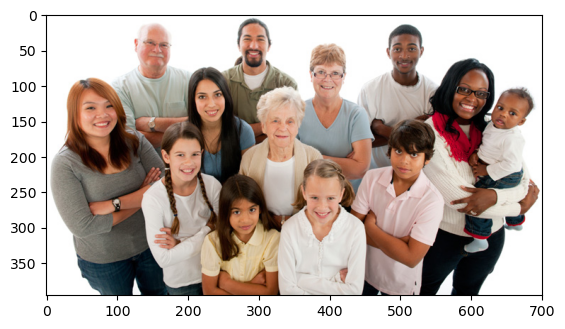

In [66]:
from imageio import imread
import imageio.v2 as imageio

url = 'https://hecatedemeter.files.wordpress.com/2013/12/diverse-crowd.jpg'
file = 'Faces.jpg'

urlretrieve(url,file);

im = imageio.imread(file)
plt.imshow(im);

Write a code that "unwraps" this image and puts it into a new im_points matrix:

In [68]:
# Turn into 3 x n vector
#####Start your code here #####
np.shape(im)

#set im points size to the number of points (pixels) of the image w/ 3 columns to store the RGB values
im_points = im.reshape((im.shape[0]*im.shape[1],3))
im_points
#####End of your code here#####

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

<Mark>&#9989; **<font color=red>Question 1.4</font>**: (6 points) Now take the image points ```im_points``` and center them using the mean vector ```mn``` calculated above into a new matrix ```im_A```. Plot the centered ```im_A``` in the **<font color="red">R</font>** **<font color="green">G</font>** **<font color="blue">B</font>** space as above.</Mark>

In [104]:
#####Start your code here #####
im_A = im_points - mn

im_A
#####End of your code here#####

array([[ 51.0080615 , 108.39888712, 141.13012446],
       [ 51.0080615 , 108.39888712, 141.13012446],
       [ 51.0080615 , 108.39888712, 141.13012446],
       ...,
       [ 51.0080615 , 108.39888712, 141.13012446],
       [ 51.0080615 , 108.39888712, 141.13012446],
       [ 51.0080615 , 108.39888712, 141.13012446]])

In [106]:
checkanswer.matrix(im_A, "0394347f996826c68245671d07e5bcf4");

Testing Answer
Answer seems to be correct



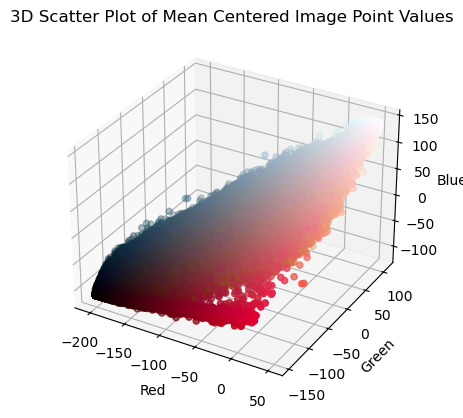

In [108]:
# Plot the image points in 3D centered around the mean vector
#####Start your code here #####
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Normalize the image point values to [0, 1] for displaying colors
im_norm = im_points / 255.0

# Scatter plot
ax.scatter(im_A[:, 0], im_A[:, 1], im_A[:, 2], c=im_norm)

ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.set_title('3D Scatter Plot of Mean Centered Image Point Values')

plt.show()

<Mark>&#9989; **<font color=red>Question 1.5</font>**: (6 points) </Mark>

* <Mark>Use the $3 \times 3$ color transformation matrix ```vecs``` calculated above to transform the ```im_A``` points into the new face PCA colorspace. Name the new points ```color_points```. </Mark>

* <Mark>Check if ```color_points``` has the same shape as ```im_points```.</Mark>

In [110]:
#####Start your code here #####

#multiply im_A by the vecs matrix
color_points = np.dot(im_A,vecs)

#validate the shapes are identical
np.shape(color_points) == np.shape(im_points)
#####End of your code here#####

True

The next step transforms the ```color_points``` back into image matrices

In [83]:
# Turn each component back into a square image
#####Start your code here #####

#first column of color points values (RED) reshaped into the image size
im1 = np.array(color_points[:,0])
im1 = im1.reshape(np.shape(im[:,:,0]))

#second column of color points values (GREEN) reshaped into the image size
im2 = np.array(color_points[:,1])
im2 = im2.reshape(np.shape(im[:,:,0]))

#third column of color points values (BLUE) reshaped into the image size
im3 = np.array(color_points[:,2])
im3 = im3.reshape(np.shape(im[:,:,0]))

#check shape and values
print(np.shape(im1))
print(im1)
print(color_points[0])
#####End of your code here#####

(396, 701)
[[-175.62867642 -175.62867642 -175.62867642 ... -175.62867642
  -175.62867642 -175.62867642]
 [-175.62867642 -175.62867642 -175.62867642 ... -175.62867642
  -175.62867642 -175.62867642]
 [-175.62867642 -175.62867642 -175.62867642 ... -175.62867642
  -175.62867642 -175.62867642]
 ...
 [-175.62867642 -175.62867642 -175.62867642 ... -175.62867642
  -175.62867642 -175.62867642]
 [-175.62867642 -175.62867642 -175.62867642 ... -175.62867642
  -175.62867642 -175.62867642]
 [-175.62867642 -175.62867642 -175.62867642 ... -175.62867642
  -175.62867642 -175.62867642]]
[-175.62867642   53.37278782  -23.99513774]


Because we are dealing with pictures, we should be able to visualize how each color point in the image falls on the eigvenvectors (aka principal components vectors).  The following code shows each principal axis as a grayscale image and the combined picture in a "skin tone" colorspace (where the first principal axis is mapped to Red, the second to Green and the third to Blue).  This last one doesn't really tell us that much but it is interesting

Text(0.5, 1.0, 'Combined')

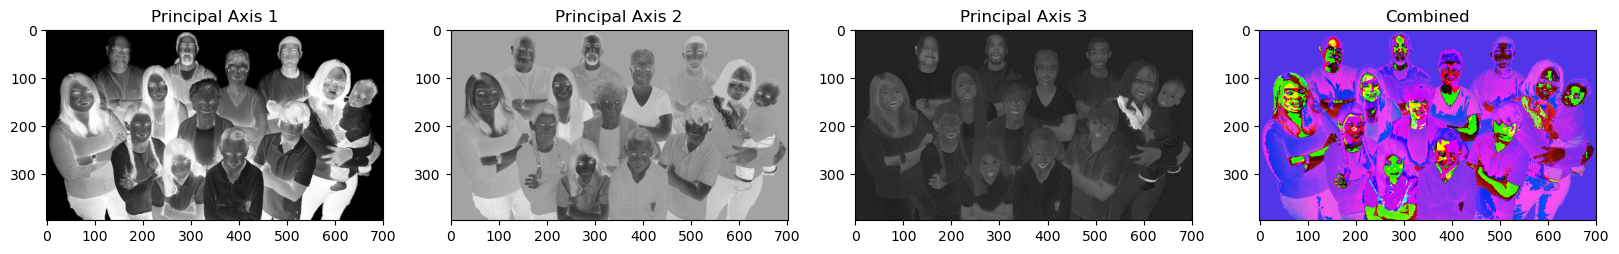

In [88]:
#####Start your code here #####

plt.subplots(1,4, figsize = (20,10))

plt.subplot(1,4,1)
plt.imshow(im1, cmap = 'gray')
plt.title('Principal Axis 1')

plt.subplot(1,4,2)
plt.imshow(im2, cmap = 'gray')
plt.title('Principal Axis 2')

plt.subplot(1,4,3)
plt.imshow(im3, cmap = 'gray')
plt.title('Principal Axis 3')

plt.subplot(1,4,4)

#define combined array (should be identical to im), don't use "=" b/c it will change the image for final part
combined = im.copy()

#set the R, G, B values for the combined array using the principal axes
combined[:,:,0] = im1 #RED
combined[:,:,1] = im2 #GREEN
combined[:,:,2] = im3 #BLUE

plt.imshow(combined)
plt.title('Combined')
#####End of your code here#####


Now, if we assume we did everything right the first picture on the right should represent the values on the first principal axis.  The second and third image are orthogonal to the first. If we assume that most of the variance in the face colors are represented in this first image than we can model faces (skin) as the values close to this axis.  

Or, another way to look at is is the points closest to the first axis are more like skin colors and the points farther away from the first image is less like a skin.  Points farther away from the first axis will have large values in the second and third principal axes.  


<Mark>&#9989; **<font color=red>Question 1.6</font>**: (6 points) create a new matrix (same size as the image) with values equal to the euclidian distance of each of the PCA points to the first principal axis. In other words, write code to do the following where $p_2$ is the second principal axis and $p_3$ is the third: 
$$ distance = \sqrt{p_2^2 + p_3^2}$$ </Mark>

In [91]:
#####Start your code here #####
distance = np.sqrt(np.square(im2)+np.square(im3))
distance
#####End of your code here#####

array([[58.5185536, 58.5185536, 58.5185536, ..., 58.5185536, 58.5185536,
        58.5185536],
       [58.5185536, 58.5185536, 58.5185536, ..., 58.5185536, 58.5185536,
        58.5185536],
       [58.5185536, 58.5185536, 58.5185536, ..., 58.5185536, 58.5185536,
        58.5185536],
       ...,
       [58.5185536, 58.5185536, 58.5185536, ..., 58.5185536, 58.5185536,
        58.5185536],
       [58.5185536, 58.5185536, 58.5185536, ..., 58.5185536, 58.5185536,
        58.5185536],
       [58.5185536, 58.5185536, 58.5185536, ..., 58.5185536, 58.5185536,
        58.5185536]])

In [93]:
checkanswer.matrix(distance, "8e1e05f148bc760af2e4d43c3f816cdc");

Testing Answer
Answer seems to be correct



We can then display this distance using the following code:

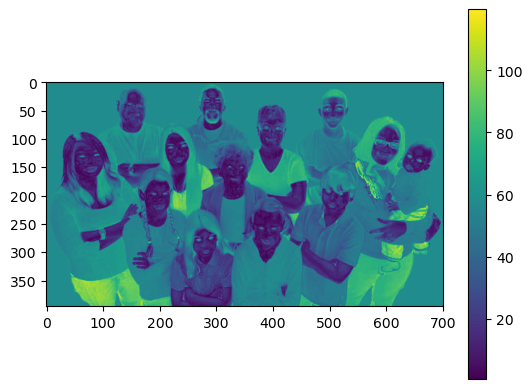

In [96]:
plt.imshow(distance, cmap='viridis')
plt.colorbar()

Low distances in the above distance matrix should represent colors close to "skin" and larger distances should represent colors farther away from skin. Write a code to pick a threshold to try and best highlight the pixels in the image that represent skin.

Text(0.5, 1.0, 'Regular')

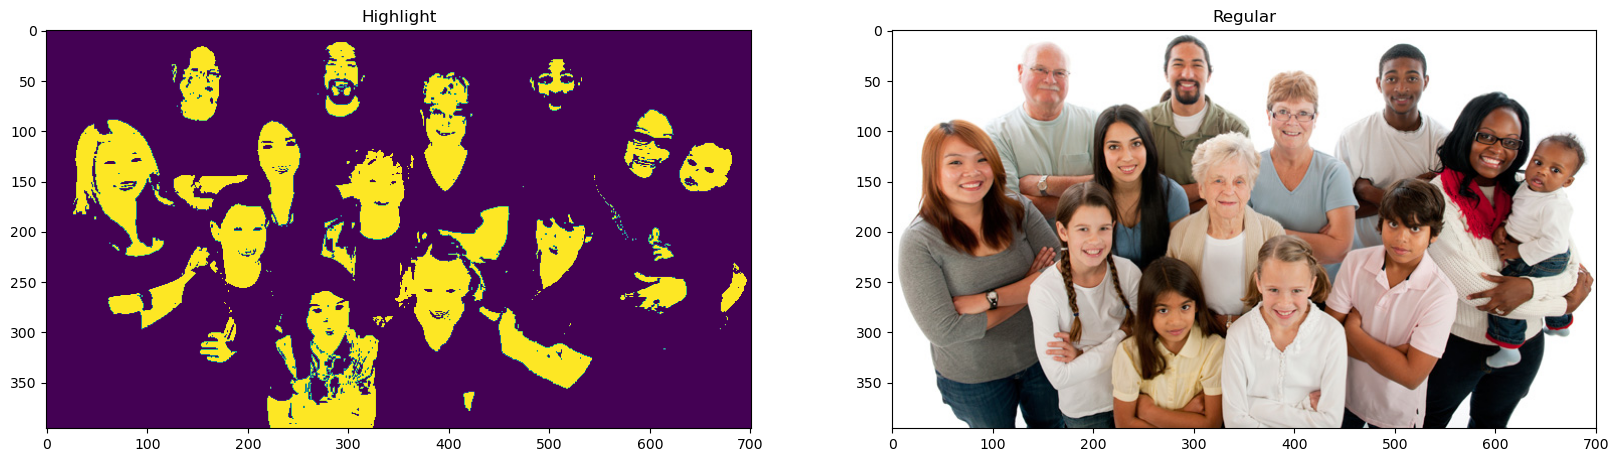

In [101]:
#####Start your code here #####
threshold = 25

highlight = distance <= threshold

plt.subplots(1,2, figsize = (20,10))

plt.subplot(1,2,1)
plt.imshow(highlight)
plt.title('Highlight')

plt.subplot(1,2,2)
plt.imshow(im)
plt.title('Regular')

#####End of your code here#####

If we did everything right the right-hand picture above should be a mask of all pixels in the left hand images that are skin tones.  Obviously this is not a perfect model.